<a href="https://colab.research.google.com/github/Chen-Wi-Ki/Colab-DogCat-CNN/blob/main/Sin_Test_for_CNN_2Value_Verify_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sin波不同頻率用來測試CNN的2值判斷是否能夠正確判別

# 讀雲端資料方法


In [1]:
from google.colab import drive
drive.mount('/content/gdrive' , force_remount=True)

Mounted at /content/gdrive


In [15]:
!ls gdrive/MyDrive/南台專案工作筆記/類神經網路CNN/深度學習/Sin波頻率二值判斷/train
print('----')
!ls gdrive/MyDrive/南台專案工作筆記/類神經網路CNN/深度學習/Sin波頻率二值判斷/test1

Sin1.1.png  Sin1.3.png	Sin1.5.png  Sin2.2.png	Sin2.4.png
Sin1.2.png  Sin1.4.png	Sin2.1.png  Sin2.3.png	Sin2.5.png
----
1.png  2.png  3.png  4.png


(3036,)
(3036,)
(3000,)
(10, 300)
(150, 300)


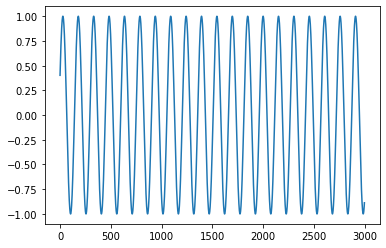

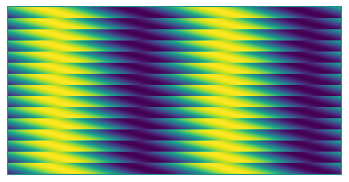

In [34]:
#sin波形(模擬威齊的圖)
import numpy as np
from matplotlib import pyplot as plt
x=np.arange(0,40*np.pi,0.0414)
print(x.shape)
y=np.sin(x)
print(y.shape)

y_sin3000point = y[10:3010]
print(y_sin3000point.shape)

y_sin1x3000point = y_sin3000point.reshape(1,3000)

plt.plot(y_sin1x3000point.T)#確認(3000,)轉成(3000,1)是否有問題

y_sin300x100point = y_sin3000point.reshape(10,300)
print(y_sin300x100point.shape)

y_sin300x100pointx15=np.vstack([y_sin300x100point, y_sin300x100point, y_sin300x100point, y_sin300x100point, y_sin300x100point, y_sin300x100point, y_sin300x100point, y_sin300x100point, y_sin300x100point, y_sin300x100point, y_sin300x100point, y_sin300x100point, y_sin300x100point, y_sin300x100point, y_sin300x100point])
print(y_sin300x100pointx15.shape)

zero_set=np.zeros([152,302])
Data=np.pad(y_sin300x100pointx15,1)
plt.show()
plt.axis('off')
plt.imshow(Data)



(3036,)
(3036,)
(3000,)
(10, 300)
(150, 300)


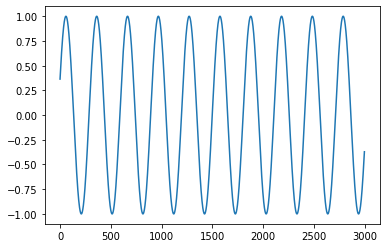

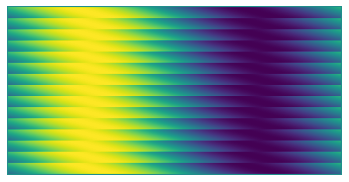

In [33]:
#sin波形(模擬鄭博的圖)
import numpy as np
from matplotlib import pyplot as plt
x=np.arange(0,20*np.pi,0.0207)
print(x.shape)
y=np.sin(x)
print(y.shape)
#plt.title("sine wave form")
#Data_xy = np.vstack([x,y])
#print(Data_xy.shape)

y_sin3000point = y[18:3018]
print(y_sin3000point.shape)

y_sin1x3000point = y_sin3000point.reshape(1,3000)

plt.plot(y_sin1x3000point.T)#確認(3000,)轉成(3000,1)是否有問題

y_sin300x100point = y_sin3000point.reshape(10,300)
print(y_sin300x100point.shape)

y_sin300x100pointx15=np.vstack([y_sin300x100point, y_sin300x100point, y_sin300x100point, y_sin300x100point, y_sin300x100point, y_sin300x100point, y_sin300x100point, y_sin300x100point, y_sin300x100point, y_sin300x100point, y_sin300x100point, y_sin300x100point, y_sin300x100point, y_sin300x100point, y_sin300x100point])
print(y_sin300x100pointx15.shape)

zero_set=np.zeros([152,302])
Data=np.pad(y_sin300x100pointx15,1)
plt.show()
plt.axis('off')
plt.imshow(Data)



In [20]:
#分別存檔train和test1
print('Train資料:')
!ls gdrive/MyDrive/南台專案工作筆記/類神經網路CNN/深度學習/Sin波頻率二值判斷/train
print('Test1資料:')
!ls gdrive/MyDrive/南台專案工作筆記/類神經網路CNN/深度學習/Sin波頻率二值判斷/test1

Train資料:
Sin1.1.png  Sin1.3.png	Sin1.5.png  Sin2.2.png	Sin2.4.png
Sin1.2.png  Sin1.4.png	Sin2.1.png  Sin2.3.png	Sin2.5.png
Test1資料:
1.png  2.png  3.png  4.png


# CNN方法

In [26]:
import numpy as np 
import pandas as pd 
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
import os
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Activation, Conv2D, MaxPooling2D

#依名稱設定成:Sin1=0,Sin2=1做訓練

train_dir = 'gdrive/MyDrive/南台專案工作筆記/類神經網路CNN/深度學習/Sin波頻率二值判斷/train'
path = os.path.join(train_dir)
X = []
y = []
convert = lambda category : int(category == 'Sin2')
def create_test_data(path):
    for p in os.listdir(path):
        category = p.split(".")[0]
        category = convert(category)
        img_array = cv2.imread(os.path.join(path,p),cv2.IMREAD_GRAYSCALE)
        new_img_array = cv2.resize(img_array, dsize=(80, 80))
        X.append(new_img_array)
        y.append(category)
create_test_data(path)
X = np.array(X).reshape(-1, 80,80,1)
y = np.array(y)
#Normalize data
X = X/255.0

#卷積設定
model = Sequential()
# Adds a densely-connected layer with 64 units to the model:
model.add(Conv2D(10,(2,2), activation = 'relu', input_shape = X.shape[1:]))
model.add(MaxPooling2D(pool_size = (2,2)))
# Add another:
model.add(Conv2D(10,(2,2), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Flatten())
model.add(Dense(20, activation='relu'))
# Add a softmax layer with 10 output units:
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer="adam",
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [27]:
#訓練3次
model.fit(X, y, epochs=3, batch_size=32)

Epoch 1/3
1/1 [==============================] - 1s 587ms/step - loss: 0.7049 - accuracy: 0.5000
Epoch 2/3
1/1 [==============================] - 0s 55ms/step - loss: 0.6242 - accuracy: 1.0000
Epoch 3/3
1/1 [==============================] - 0s 38ms/step - loss: 0.5367 - accuracy: 1.0000


In [42]:
#測試
train_dir = 'gdrive/MyDrive/南台專案工作筆記/類神經網路CNN/深度學習/Sin波頻率二值判斷/test1'
path = os.path.join(train_dir)
#os.listdir(path)
X_test = []
id_line = []
def create_test1_data(path):
    for p in os.listdir(path):
        id_line.append(p.split(".")[0])
        img_array = cv2.imread(os.path.join(path,p),cv2.IMREAD_GRAYSCALE)
        #print(img_array.shape)
        new_img_array = cv2.resize(img_array, dsize=(80, 80))
        X_test.append(new_img_array)
create_test1_data(path)
X_test = np.array(X_test).reshape(-1,80,80,1)
X_test = X_test/255
predictions = model.predict(X_test)
predicted_val = [int(round(p[0])) for p in predictions]
submission_df = pd.DataFrame({'id':id_line, '判斷':predicted_val})
print(submission_df)
#submission_df.to_csv('gdrive/MyDrive/南台專案工作筆記/類神經網路CNN/深度學習/Sin波頻率二值判斷/test1/TestResult.csv', index=False)


      id  判斷
0  Test1   0
1  Test2   1
2  Test3   0
3  Test4   1
4  Test5   0
5  Test7   0
6  Test8   1
7  Test6   1


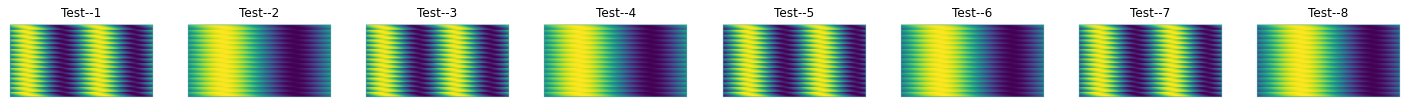

In [41]:
#讀取測試用圖片
import cv2
import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize=(25,25))
for i in range(1,9,1):
  plt.subplot(1,8,i)
  plt.title('Test--%d' % i)
  img1=cv2.imread("gdrive/MyDrive/南台專案工作筆記/類神經網路CNN/深度學習/Sin波頻率二值判斷/test1/Test%d.png" % i)#自訂義
  cv2plt = cv2.cvtColor(img1,cv2.COLOR_RGB2BGR)#BGR轉換RGB
  #plt.imshow(img1)#BGR沒轉換直接用plt輸出的結果
  plt.imshow(cv2plt)#轉換RGB後用plt輸出的結果(一般習慣是用這個)
  plt.axis('off')

plt.show()